### TTim example of pumping test analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ttim import *

Load data of two observation wells

In [2]:
drawdown = np.loadtxt('data/oudekorendijk_h30.dat')
to1 = drawdown[:,0] / 60 / 24
ho1 = -drawdown[:,1]
ro1 = 30

drawdown = np.loadtxt('data/oudekorendijk_h90.dat')
to2 = drawdown[:,0] / 60 / 24
ho2 = -drawdown[:,1]
ro2 = 90

Pumping discharge

In [3]:
Qo = 788

Create model

In [4]:
ml = ModelMaq(kaq=60, z=(-18, -25), Saq=1e-4, tmin=1e-5, tmax=1)
w = Well(ml, xw=0, yw=0, rw=0.1, tsandQ=[(0, 788)], layers=0)
ml.solve()

self.neq  1
solution complete


Create calibration object, add parameters and first series. Fit the model. The chi-square value is the mean of the squared residuals at the optimum.

In [5]:
cal = Calibrate(ml)
cal.set_parameter(name='kaq0', initial=10)
cal.set_parameter(name='Saq0', initial=1e-4)
cal.series(name='obs1', x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.fit(report=True)
display(cal.parameters)
print('rmse:', cal.rmse())
print('mse:', cal.rmse() ** 2 * len(ho1))
h1a = ml.head(ro1, 0, to1, 0) # simulated head
h2a = ml.head(ro2, 0, to2, 0) # simulated head

...............................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 34
    # variables        = 2
    chi-square         = 0.03407540
    reduced chi-square = 0.00106486
    Akaike info crit   = -230.788364
    Bayesian info crit = -227.735643
[[Variables]]
    kaq0:  68.6432465 +/- 1.43808066 (2.10%) (init = 10)
    Saq0:  1.6066e-05 +/- 1.5806e-06 (9.84%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.891


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,68.6432,1.438081,2.09501,-inf,inf,10,[68.64324645452542]
Saq0,1.60665e-05,0.000002,9.8379,-inf,inf,0.0001,[1.606645694327689e-05]


rmse: 0.03165782078840182
mse: 0.03407539898039926


In [6]:
# second observation well
cal = Calibrate(ml)
cal.set_parameter(name='kaq0', initial=50)
cal.set_parameter(name='Saq0', initial=1.5e-5)
cal.series(name='obs1', x=ro2, y=0, layer=0, t=to2, h=ho2)
cal.fit(report=False)
display(cal.parameters)
h1b = ml.head(ro1, 0, to1, 0) # simulated head
h2b = ml.head(ro2, 0, to2, 0) # simulated head

......................
Fit succeeded.


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,71.5847,1.574273,2.19918,-inf,inf,50,[71.58469333796758]
Saq0,2.91042e-05,0.000002,6.65756,-inf,inf,1.5e-05,[2.910424903098926e-05]


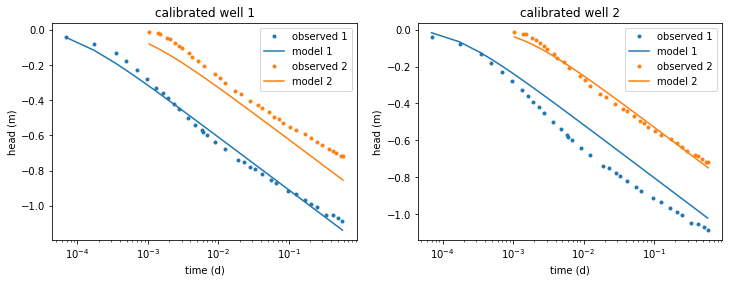

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.semilogx(to1, ho1, 'C0.', label='observed 1')
plt.semilogx(to1, h1a[0], 'C0', label='model 1')
plt.semilogx(to2, ho2, 'C1.', label='observed 2')
plt.semilogx(to2, h2a[0], 'C1', label='model 2')
plt.title('calibrated well 1')
plt.xlabel('time (d)')
plt.ylabel('head (m)')
plt.legend()
plt.subplot(122)
plt.semilogx(to1, ho1, 'C0.', label='observed 1')
plt.semilogx(to1, h1b[0], 'C0', label='model 1')
plt.semilogx(to2, ho2, 'C1.', label='observed 2')
plt.semilogx(to2, h2b[0], 'C1', label='model 2')
plt.title('calibrated well 2')
plt.xlabel('time (d)')
plt.ylabel('head (m)')
plt.legend();

### Add wellbore storage

In [8]:
ml = ModelMaq(kaq=60, z=(-18, -25), Saq=1e-4, tmin=1e-5, tmax=1)
w = Well(ml, xw=0, yw=0, rw=0.1, rc=0.2, tsandQ=[(0, 788)], layers=0)
ml.solve()

self.neq  1
solution complete


In [9]:
cal = Calibrate(ml)
cal.set_parameter(name='kaq0', initial=10)
cal.set_parameter(name='Saq0', initial=1e-5)
cal.set_parameter(name='rc', parameter=w.rc, initial=0.2, pmin=0.01, pmax=1)
cal.series(name='obs1', x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.fit(report=False)
display(cal.parameters)
h1a = ml.head(ro1, 0, to1, 0) # simulated head
h2a = ml.head(ro2, 0, to2, 0) # simulated head

....................................................
Fit succeeded.


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,80.8912,1.760732e+00,2.17667,-inf,inf,10,[80.89124617448037]
Saq0,5.48424e-06,8.118776e-07,14.8038,-inf,inf,1e-05,[5.484243171877451e-06]
rc,0.289219,1.710914e-02,5.91563,0.01,1.0,0.2,[0.2892190775596667]


In [10]:
cal = Calibrate(ml)
cal.set_parameter(name='kaq0', initial=10)
cal.set_parameter(name='Saq0', initial=1e-5)
cal.set_parameter(name='rc', parameter=w.rc, initial=0.2, pmin=0.01, pmax=1)
cal.series(name='obs1', x=ro2, y=0, layer=0, t=to2, h=ho2)
cal.fit(report=False)
display(cal.parameters)
h1b = ml.head(ro1, 0, to1, 0) # simulated head
h2b = ml.head(ro2, 0, to2, 0) # simulated head

................................................
Fit succeeded.


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,88.1627,1.427134e+00,1.61875,-inf,inf,10,[88.16273027633643]
Saq0,1.14637e-05,9.121369e-07,7.95675,-inf,inf,1e-05,[1.1463691339128018e-05]
rc,0.640659,2.820606e-02,4.40266,0.01,1.0,0.2,[0.6406593767867873]


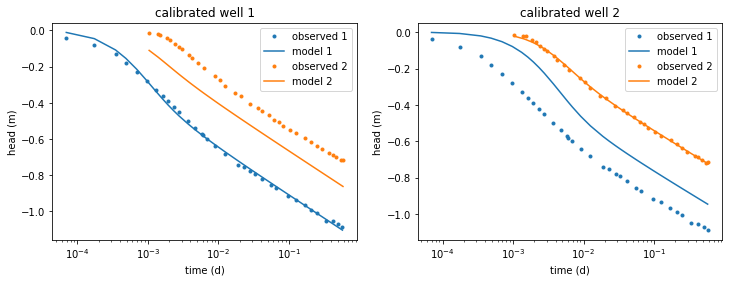

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.semilogx(to1, ho1, 'C0.', label='observed 1')
plt.semilogx(to1, h1a[0], 'C0', label='model 1')
plt.semilogx(to2, ho2, 'C1.', label='observed 2')
plt.semilogx(to2, h2a[0], 'C1', label='model 2')
plt.title('calibrated well 1')
plt.xlabel('time (d)')
plt.ylabel('head (m)')
plt.legend()
plt.subplot(122)
plt.semilogx(to1, ho1, 'C0.', label='observed 1')
plt.semilogx(to1, h1b[0], 'C0', label='model 1')
plt.semilogx(to2, ho2, 'C1.', label='observed 2')
plt.semilogx(to2, h2b[0], 'C1', label='model 2')
plt.title('calibrated well 2')
plt.xlabel('time (d)')
plt.ylabel('head (m)')
plt.legend();

### Two observation wells simultaneously

In [12]:
cal = Calibrate(ml)
cal.set_parameter(name='kaq0', initial=10)
cal.set_parameter(name='Saq0', initial=1e-5)
cal.set_parameter(name='rc', parameter=w.rc, initial=0.2, pmin=0.01, pmax=1)
cal.series(name='obs1', x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.series(name='obs2', x=ro2, y=0, layer=0, t=to2, h=ho2)
cal.fit(report=False)
display(cal.parameters)

............................................................
Fit succeeded.


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,66.0983,1.687864,2.55357,-inf,inf,10,[66.09826039203237]
Saq0,2.5393e-05,0.000003,9.91938,-inf,inf,1e-05,[2.5392951627900582e-05]
rc,0.01,0.010888,108.875,0.01,1.0,0.2,[0.01000004512539029]


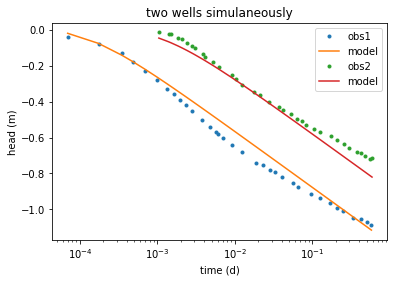

In [13]:
h1 = ml.head(ro1, 0, to1, 0)
plt.semilogx(to1, ho1, '.', label='obs1')
plt.semilogx(to1, h1[0], label='model')
h2 = ml.head(ro2, 0, to2, 0)
plt.semilogx(to2, ho2, '.', label='obs2')
plt.semilogx(to2, h2[0], label='model')
plt.title('two wells simulaneously')
plt.xlabel('time (d)')
plt.ylabel('head (m)')
plt.legend();